In [2]:
import pandas as pd


# 1 - CONHECENDO A BASE DE DADOS

## 1.1 - Importando os Dados

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

dados = pd.read_csv(url, sep=';')
dados.head() # head and tail should be used to show just some lines


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
dados.tail(3)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [5]:
type(dados)


pandas.core.frame.DataFrame

## 1.2 - Características Gerais dos Dados

In [6]:
lines, columns = dados.shape

print(f'O DataFrame tem {lines} linhas e {columns} colunas')


O DataFrame tem 32960 linhas e 9 colunas


In [7]:
dados.columns


Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [8]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


Como podemos ver, o método `.info()` mostra algumas informações gerais sobre os dados do DataFrame, sendo um sumarizador iniciar da base de dados.

In [9]:
rename_map = {'Tipo': 'Tipo (object)', 'Valor': 'Valor (int64)', 'Quartos': 'Quartos (float64)'}
dados[['Tipo', 'Valor', 'Quartos']].rename(rename_map, axis='columns')


,Tipo (object),Valor (int64),Quartos (float64)
0,Quitinete,1700.0,1
1,Casa,7000.0,2
2,Conjunto Comercial/Sala,5200.0,0
3,Apartamento,800.0,1
4,Apartamento,800.0,1
...,...,...,...
32955,Quitinete,800.0,0
32956,Apartamento,1800.0,3
32957,Apartamento,1400.0,2
32958,Apartamento,3000.0,2


Aqui podemos ver como é cada um dos tipos de coluna, `object`, `int64` e `float64`. Ainda temos outros tipos existentes no Pandas, mas esses serão os mais comuns

# 2 - ANÁLISE EXPLORATÓRIA DE DADOS

O processo de Análise Exploratória de Dados (EDA) consiste em buscar entender como são estruturados os dados que queremos analisar.

É um processo de caráter investigativo, onde tentamos compreender várias características, como: os valores presentes nas colunas, os tipos de estrutura de dados, verificar se são dados qualitativos ou quantitativos, se há valores faltantes ou incomuns.

Por isso, nesse momento, perguntas sobre os dados são sempre bem-vindas. Elas irão guiar todo o processo de análise, e, através das ferramentas disponíveis, como o nosso querido Pandas, iremos buscar por respostas.

## 2.1 - Valor médio de aluguel dos imóveis

Esse cálculo que queremos executar pode ser entendido como uma cálculo de agregação de um agrupamento (no caso tipo de imóvel). Então veremos cada uma das etapas, primeiramente como é feito o cálculo da média e depois como agrupar dados.

Importante notar que podemos agrupar um DataFrame, com `groupby`, por uma ou múltiplas colunas.

In [10]:
dados.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [21]:
dados.mean(numeric_only=True)


Quartos           1.771390
Vagas             1.749059
Suites            0.665777
Area            231.901547
Valor         12952.659715
Condominio     2388.062424
IPTU           2364.409585
dtype: float64

Os dados agrupados serão definidos como `DataFrameGroupBy`, um tipo que não tem uma visualização por ter vários dados para cada grupo. Então uma das estratégias é usar medidas de sumarização para analisar cada grupo, dessa forma entendendo como cada grupo se comporta.

**Para esse exemplo usaremos a média como medida de sumarização.**

In [23]:
dados.groupby('Tipo')


In [22]:
dados.groupby('Tipo')['Valor'].mean()


Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [30]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')


,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


Uma vez que já temos os dados por grupo agora é necessário analisarmos os dados para identificar como usar os dados. Uma estratégia interessante é usar recursos visuais para entender melhor cada grupo.

Além disso, a estratégia de ordenar os grupos é interessante para simplificar a visualização.

<Axes: ylabel='Tipo'>

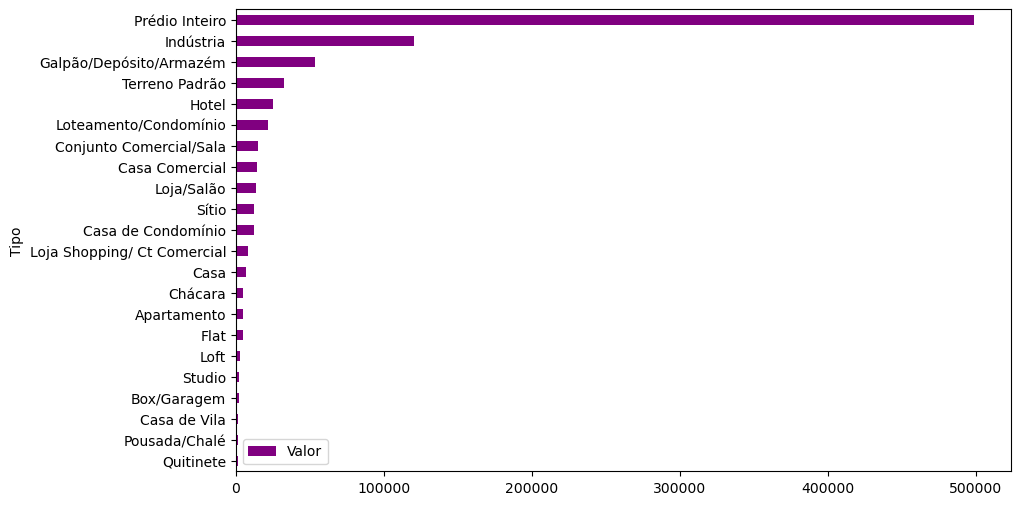

In [79]:
def plot_media_por_tipo(df: pd.DataFrame):
    df_grouped = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
    plot = df_grouped.plot(kind='barh', figsize=(10,6), color='purple')
    return df_grouped, plot

plot_media_por_tipo(dados)[1]


O que podemos analisar é uma grande variação por tipo de imóvel, para alguns casos (como o que estamos trabalhando) isso não é ideal, pois modelos de ML (machine learning) podem ter problemas com dados com alta variancia. Além disso, estaremos focando em alugueis residenciais. Então será uma necessidade filtrar esses tipos de dados.

## 2.2 Remoção de Dados por Filtragem

Primeiramente é ideal vermos todos os tipos de imóveis e depois identificar quais são comerciais (isso poderia ser visto com um time de negócio em outro caso). Para então podermos filtrar esses dados

In [34]:
dados.Tipo.unique()


array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [35]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
                                            


O método `query` faz algo semelhante a uma query em SQL, faz uma seleção com base em uma pesquisa booleana no DataFrame, caso for True retorna o valor. Nesse caso usamos uma variável (utilizando `@` para determinar que é uma variável) para comparar uma coluna com um array, utilizando `in` e `not in`.

In [41]:
dados.query('@imoveis_comerciais in Tipo').reset_index(drop=True)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
1,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
2,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
3,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
4,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
9844,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
9845,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
9846,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
9847,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [43]:
dados_residenciais = dados.query('@imoveis_comerciais not in Tipo').reset_index(drop=True)
dados_residenciais


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23106,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23107,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23108,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23109,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Com isso reduzimos as colunas para apenas terrmos dados residenciais!

In [44]:
dados_residenciais.Tipo.unique()


array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

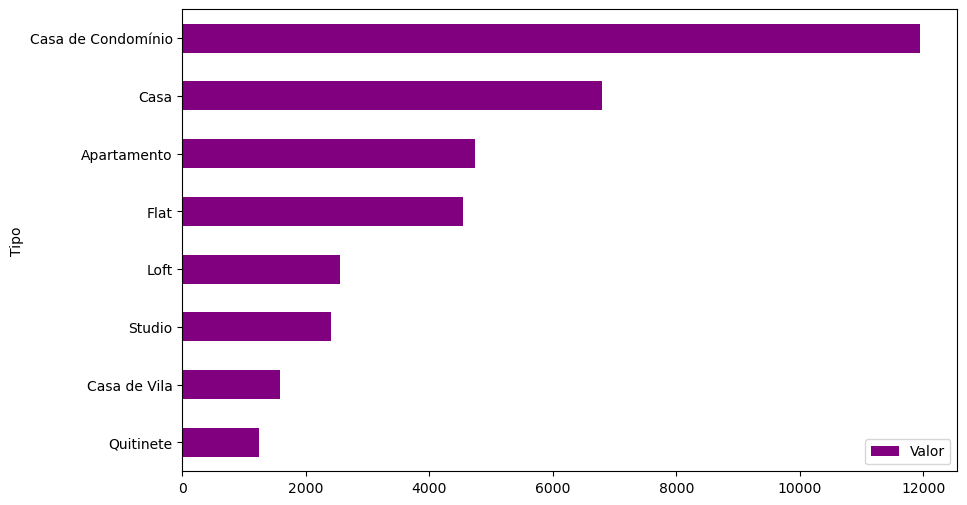

In [80]:
plot_media_por_tipo(dados_residenciais)[1]


## 2.3 Percentual dos tipos de imóveis

In [72]:
dados_residenciais['Tipo'].value_counts()


Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

In [86]:
percentual_tipo = dados_residenciais['Tipo'].value_counts(normalize=True, sort=True).to_frame('Percentual')
percentual_tipo


,Percentual
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


<Axes: xlabel='Tipo', ylabel='Percentual'>

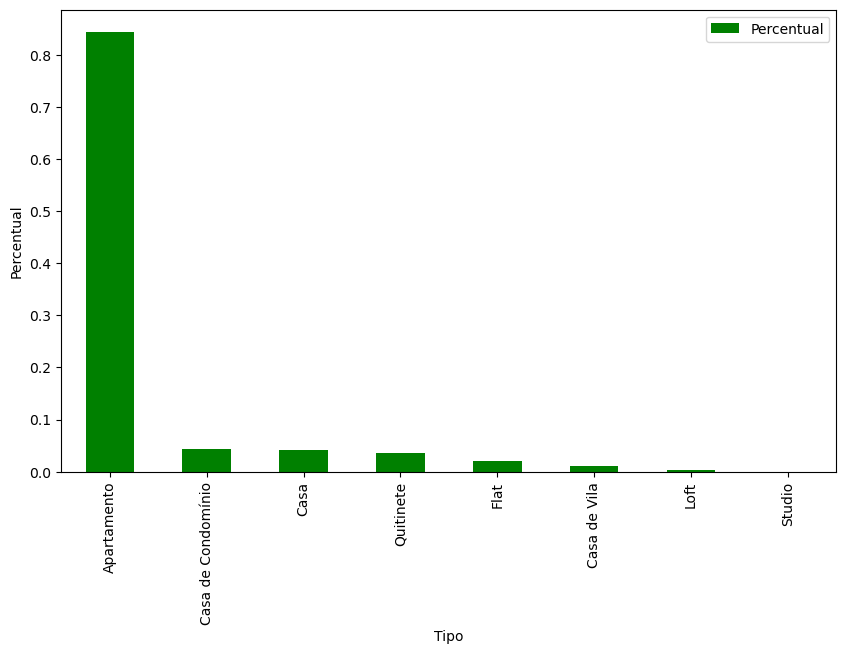

In [81]:
percentual_tipo.plot(kind='bar', figsize=(10,6), color='green', xlabel='Tipo', ylabel='Percentual')


Para prosseguir com a análise vamos trabalhar apenas com apartamentos.

In [84]:
dados_apartamentos = dados_residenciais.query('Tipo == "Apartamento"')
dados_apartamentos.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
